<a href="https://colab.research.google.com/github/AnanyaSamala/Fundamentals-of-AI/blob/main/Lstm_72hr_Gx_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Reading df

In [99]:
df = pd.read_csv('/content/31_July-30_Aug_Gx (1).csv', index_col="date", infer_datetime_format=True, parse_dates=True)
df.head(5)

,time,volume,open,high,low,close
date,,,,,,
2023-07-31,0:00,156,80.47,80.48,80.40,80.41
2023-07-31,0:05,174,80.40,80.43,80.39,80.41
2023-07-31,0:10,129,80.42,80.46,80.40,80.43
2023-07-31,0:15,145,80.43,80.43,80.37,80.40
2023-07-31,0:20,49,80.39,80.42,80.39,80.41


In [100]:
df.tail()

,time,volume,open,high,low,close
date,,,,,,
2023-08-30,23:35,9,81.65,81.65,81.65,81.65
2023-08-30,23:40,18,81.65,81.65,81.65,81.65
2023-08-30,23:45,19,81.65,81.65,81.64,81.64
2023-08-30,23:50,23,81.65,81.65,81.63,81.63
2023-08-30,23:55,17,81.63,81.64,81.63,81.63


In [101]:
len(df)

6791

In [102]:
#index = pd.to_datetime(['2023-07-03 00:00', '2023-07-03 00:05', '2023-07-03 00:10', '2023-07-03 00:15'])

# Filter data for the specified date range
start_date ='2023-08-01'
end_date =  '2023-08-03'
df = df[start_date:end_date]

print(df)

             time  volume   open   high    low  close
date                                                 
2023-08-01   0:00      59  81.64  81.67  81.63  81.65
2023-08-01   0:05     217  81.64  81.64  81.57  81.61
2023-08-01   0:10     228  81.64  81.67  81.57  81.66
2023-08-01   0:15      48  81.66  81.69  81.66  81.67
2023-08-01   0:20       1  81.68  81.68  81.68  81.68
...           ...     ...    ...    ...    ...    ...
2023-08-03  23:35      91  81.80  81.82  81.79  81.80
2023-08-03  23:40      66  81.80  81.81  81.78  81.79
2023-08-03  23:45     135  81.80  81.81  81.78  81.79
2023-08-03  23:50     153  81.79  81.81  81.76  81.76
2023-08-03  23:55      39  81.76  81.77  81.75  81.77

[879 rows x 6 columns]


- dropping

In [103]:
df = df.drop(['high','low','volume','open', 'time'], axis=1)
df.head()

,close
date,
2023-08-01,81.65
2023-08-01,81.61
2023-08-01,81.66
2023-08-01,81.67
2023-08-01,81.68


In [104]:
dataset = df.values
dataset = dataset.astype('float64')
dataset[:5]

array([[81.65],
       [81.61],
       [81.66],
       [81.67],
       [81.68]])

### plotting data

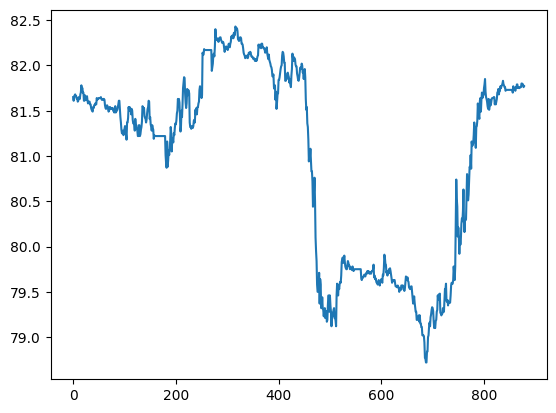

In [105]:
plt.plot(dataset)
plt.show()

### normalizing data

In [106]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[0.78975741]
 [0.77897574]
 [0.79245283]
 [0.79514825]
 [0.79784367]] 

(879, 1)


### Method for making data and timestep

In [107]:
# lookback -> timestep
def create_dataset(dataset,look_back):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-look_back-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+look_back),0])
        data_y.append(dataset[i+look_back,0])
    return np.array(data_x) , np.array(data_y)

### split dataset

In [108]:
train_size = int(len(dataset) * 0.80)
train , test = dataset[0:train_size,:] , dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)

(703, 1)
(176, 1)


In [109]:
train[:3]

array([[0.78975741],
       [0.77897574],
       [0.79245283]])

### Making data train & test x,y

In [110]:
n_steps = 5 #timestep or look_up


train_x , train_y = create_dataset(train, n_steps)
test_x , test_y = create_dataset(test, n_steps)

#train_x , train_y = create_dataset(n_steps, n_features)
#test_x , test_y = create_dataset(n_steps, n_features)

In [111]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(697, 5) (697,)
(170, 5) (170,)


In [112]:
train_y[:3]

array([0.79245283, 0.79245283, 0.78436658])

In [113]:
for i in range(len(test_x)):
    print(test_x[i],test_y[i])

print(train_x[:5],'\n')
print(train_y[:5])

[0.10242588 0.10512129 0.10242588 0.12398922 0.12668464] 0.15094339622641684
[0.10512129 0.10242588 0.12398922 0.12668464 0.1509434 ] 0.15633423180592843
[0.10242588 0.12398922 0.12668464 0.1509434  0.15633423] 0.199460916442046
[0.12398922 0.12668464 0.1509434  0.15633423 0.19946092] 0.18598382749325992
[0.12668464 0.1509434  0.15633423 0.19946092 0.18598383] 0.20215633423180535
[0.1509434  0.15633423 0.19946092 0.18598383 0.20215633] 0.199460916442046
[0.15633423 0.19946092 0.18598383 0.20215633 0.19946092] 0.2048517520215647
[0.19946092 0.18598383 0.20215633 0.19946092 0.20485175] 0.1482479784366575
[0.18598383 0.20215633 0.19946092 0.20485175 0.14824798] 0.1455525606469017
[0.20215633 0.19946092 0.20485175 0.14824798 0.14555256] 0.140161725067383
[0.19946092 0.20485175 0.14824798 0.14555256 0.14016173] 0.1455525606469017
[0.20485175 0.14824798 0.14555256 0.14016173 0.14555256] 0.1455525606469017
[0.14824798 0.14555256 0.14016173 0.14555256 0.14555256] 0.16172506738544357
[0.1455525

### Converting data to three-dimensional or three-channel
- The input must be three-dimensional or three-channel, that's why we reshape it


In [114]:
trainxr = np.reshape(train_x,(train_x.shape[0],train_x.shape[1], 1))
testxr = np.reshape(test_x,(test_x.shape[0],test_x.shape[1], 1))

print(trainxr.shape)
print(testxr.shape)

(697, 5, 1)
(170, 5, 1)


In [115]:
train_x = trainxr
test_x = testxr

In [116]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(697, 5, 1) (697,)
(170, 5, 1) (170,)


### training model

In [117]:
# it is often better to start with a higher learning rate, such as 0.01, and observe
# the training progress. If you notice that the model's loss is not decreasing or if it is fluctuating
# too much, you can reduce the learning rate to 0.0001 or even lower.
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.regularizers import l1, l2
#learning_rate = 0.01
#optimizer = Adam(learning_rate=learning_rate)
import random
random.seed(42)

n_steps = 5
n_features = 1
model = Sequential()
#model.add(LSTM(50, activation = 'relu', input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation = 'relu', input_shape=(n_steps, n_features), return_sequences=True))
#model.add(LSTM(50, activation = 'relu'))
model.add(LSTM(50, activation='relu', kernel_regularizer=l1(0.01)))

#model.add(Dropout(0.1))
model.add(Dense(1)) #n-output
model.compile(optimizer='adam',loss='mse')


In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [119]:
#verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing
#model.fit(train_x, train_y, epochs=50, shuffle=False, batch_size=2)
history=model.fit(train_x, train_y, epochs=10, batch_size=5, shuffle=False, validation_data=(test_x,test_y))
#history = model.fit(train_x, train_y, epochs=10, shuffle=False, validation_data=(test_x,test_y))
model.reset_states()

Epoch 1/10
140/140 [==============================] - 7s 27ms/step - loss: 3.0275 - val_loss: 0.3174
Epoch 2/10
140/140 [==============================] - 3s 24ms/step - loss: 0.0804 - val_loss: 0.2027
Epoch 3/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0614 - val_loss: 0.1982
Epoch 4/10
140/140 [==============================] - 4s 31ms/step - loss: 0.0540 - val_loss: 0.1948
Epoch 5/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0493 - val_loss: 0.1927
Epoch 6/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0466 - val_loss: 0.1920
Epoch 7/10
140/140 [==============================] - 4s 32ms/step - loss: 0.0450 - val_loss: 0.1857
Epoch 8/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0429 - val_loss: 0.1784
Epoch 9/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0412 - val_loss: 0.1669
Epoch 10/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0385 - val_lo

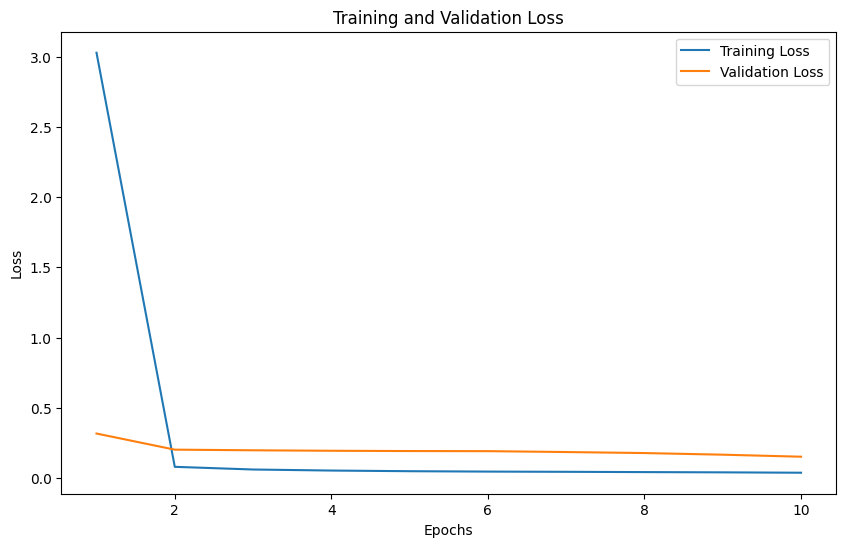

In [120]:
# Extract training loss and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Saving model

In [121]:
model.save('/content/drive')

In [122]:
# loading model
new_model = tf.keras.models.load_model('/content/drive')

### Testing model

In [123]:
predict_train = new_model.predict(train_x)
predict_test = new_model.predict(test_x)
print('predicted y(train):', np.reshape(predict_train[:5],-1))
print('real y(train):', train_y[:5])

6/6 [==============================] - 0s 4ms/step
predicted y(train): [0.33669773 0.3369038  0.33876264 0.33890736 0.33845463]
real y(train): [0.79245283 0.79245283 0.78436658 0.78706199 0.77628032]


In [124]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform([train_y])

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform([test_y])

In [125]:
print(predict_train[:5])

[[79.96915]
 [79.96992]
 [79.97681]
 [79.97735]
 [79.97567]]


### creating df and plotting

In [126]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
})
Answer1.head()

,Predicted,real
0,79.969147,81.66
1,79.969917,81.66
2,79.976807,81.63
3,79.977348,81.64
4,79.975670,81.60


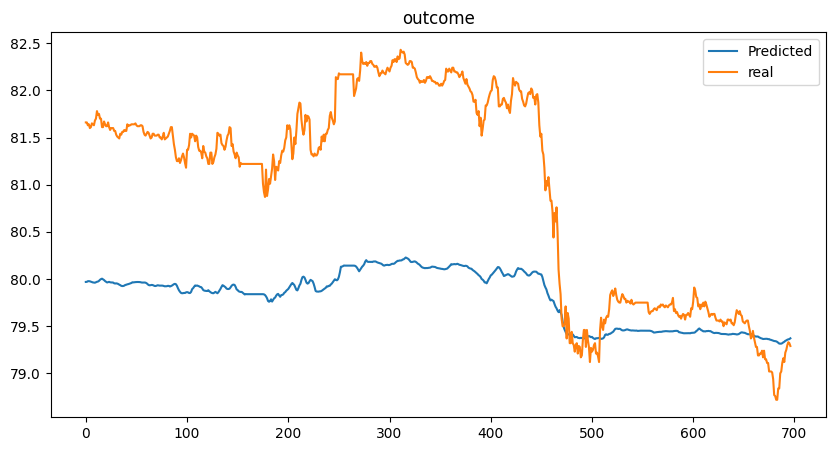

In [127]:
#train
Answer1.plot(title="outcome", figsize=(10,5));

In [128]:
# xx2 = test_x.reshape(-1,1)
# xx2 = scaler.inverse_transform(xx2)
# xx2[:8]

In [129]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
})
Answer2.head()

,Predicted,real
0,79.353546,79.28
1,79.355705,79.30
2,79.359131,79.46
3,79.366615,79.41
4,79.372589,79.47


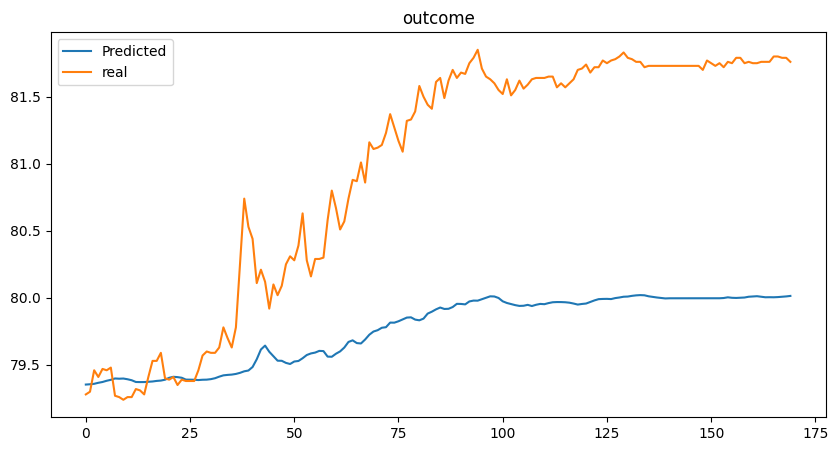

In [130]:
#test
Answer2.plot(title="outcome", figsize=(10,5));

### Evaluate the model

In [131]:
model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 4ms/step - loss: 0.1524


0.15244439244270325

In [132]:
#train_score = math.sqrt(mean_squared_error(trainy.reshape(-1),predict_train))
#print('rmse ', train_score)
#test_score = math.sqrt(mean_squared_error(test_y.reshape(-1),predict_test))
#print('rmse ', test_score)

# Forecasting


In [133]:
# Generate input for forecasting next 10 predictions

last_sequence = test_y[-n_steps:]  # Use the last n_steps data from the test set
forecast_input = np.array([last_sequence])

# Reshape the forecast input to match the input shape of the LSTM model
forecast_input = forecast_input.reshape((forecast_input.shape[0], n_steps, n_features))

# Make predictions for the next 10 days
forecast = []
for _ in range(10):
    next_pred = model.predict(forecast_input)
    forecast.append(next_pred)
    forecast_input = np.roll(forecast_input, -1)
    forecast_input[-1, -1, 0] = next_pred  # Update the last value in the input with the new prediction

# Reshape forecast array to 2D (n_samples, n_features)
forecast = np.array(forecast).reshape(-1, 1)

# Denormalize forecasted values
forecast = scaler.inverse_transform(forecast)

# Display forecast for the next 10 predictions
print("Forecast for the next 5 predictions:", forecast.flatten())



1/1 [==============================] - 0s 23ms/step
Forecast for the next 5 predictions: [80.01816  79.99809  79.93879  79.8334   79.67913  79.49764  79.48435
 79.46464  79.441475 79.41929 ]


In [134]:
#Create a DataFrame
output_df = pd.DataFrame(forecast, columns=['Predicting close'])

#Export DataFrame to an CSV file
output_csv_path = 'Predictions'
output_df.to_csv(output_csv_path, index=False)

In [135]:
# Assuming actual_values and predicted_values are your arrays/lists of actual and predicted values
mse = mean_squared_error(df['close'][:10], forecast)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.928735110278313


In [136]:
tf.saved_model.save(model, 'saved_model')